In [242]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
%matplotlib inline 

In [3]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb')
cursor = connection.cursor()

In [4]:
cursor.execute('''
SELECT *
FROM wallstreetbets''')

379139

In [6]:
table_rows = cursor.fetchall()

In [13]:
df = pd.DataFrame(table_rows)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       379139 non-null  object
 1   1       379139 non-null  int64 
 2   2       379139 non-null  object
 3   3       379139 non-null  object
 4   4       379139 non-null  object
 5   5       379139 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB


In [14]:
df.head(5)

,0,1,2,3,4,5
0,afrankiewicz12,1,,2021-02-09T08:01:01,Did anyone know you can view daily short volum...,ftp://ftp.nasdaqtrader.com/files/shortsaledata...
1,Krackis,1,,2021-02-02T08:23:51,NYSE short circuit breaker report Showing $GME...,ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...
2,[deleted],1,[deleted],2021-02-02T09:18:56,"NYSE puts GME on Short Sale Restriction List, ...",ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...
3,SolAureusAstra,3,,2021-02-02T08:02:11,GME has been put on the NYSE Short Sale Circui...,ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...
4,narengan,1,,2021-02-26T01:57:25,SSR List 25-02-2021 AMC ✅ GME ❌,ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...


In [18]:
df.sample(5)

,0,1,2,3,4,5
322302,Jweeds_420,1,"Hey everyone, I’m so happy to finally be getti...",2021-03-02T13:16:48,New to trading!,https://www.reddit.com/r/wallstreetbets/commen...
287647,Traditional_Mode8480,1,[removed],2021-02-14T14:07:10,Butterfly IPO,https://www.reddit.com/r/wallstreetbets/commen...
231687,lovecoley,1,[removed],2021-02-03T10:12:38,I still have not been able to buy and I know t...,https://www.reddit.com/r/wallstreetbets/commen...
317126,ughlacrossereally,3,[removed],2021-02-26T08:03:19,are you going to watch the movie?,https://www.reddit.com/r/wallstreetbets/commen...
150650,Zino82,1,,2021-03-09T14:28:49,We're going full Gump from here on out,https://v.redd.it/9omd308ow2m61


In [ ]:
time, author, title, score, selftext, url

In [20]:
df.columns = ['author', 'score', 'selftext', 'time', 'title', 'url']

In [36]:
df.sort_values(by='time',ascending=False).tail()

,author,score,selftext,time,title,url
176530,cluttso,1,[removed],2021-02-01T11:04:54,SNDL,https://www.reddit.com/r/wallstreetbets/commen...
176529,DiscussionUnusual466,1,[removed],2021-02-01T11:04:53,"""Most hedge funds fail: their average life spa...",https://www.reddit.com/r/wallstreetbets/commen...
176528,[deleted],0,[deleted],2021-02-01T11:04:51,GME and AMC is a dying horse. Anyone still in ...,https://www.reddit.com/r/wallstreetbets/commen...
33217,Aquemini87,0,,2021-02-01T11:04:51,Better Late Than Never! I’m in today!,https://i.redd.it/72ofzbsizwe61.jpg
156853,[deleted],3,[deleted],2021-02-01T11:04:48,I DEVELOPED A AUTISTIC APP TO SEND US TO MOONN...,https://v.redd.it/umhbf4ghzwe61


**Change date to date time data type**

In [37]:
df['time'] = pd.to_datetime(df['time'])

In [41]:
df['day_of_week'] = df['time'].dt.day_name()

**daily # of submissions**

In [ ]:
df['day_of_week'].value_counts()

**day by day submission**

In [68]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [69]:
df.groupby(['year','month','day']).agg({'title':'count'})

title
year month day       
2021 2     1    32744
           2    62179
           3    31256
           4    19132
           7     1058
...               ...
     4     22    1606
           23    1544
           24     872
           25     917
           26    1350

[68 rows x 1 columns]

In [70]:
day_by = df.groupby(['year', 'month','day']).agg({'title':'count'}).reset_index()

In [71]:
day_by

,year,month,day,title
0,2021,2,1,32744
1,2021,2,2,62179
2,2021,2,3,31256
3,2021,2,4,19132
4,2021,2,7,1058
...,...,...,...,...
63,2021,4,22,1606
64,2021,4,23,1544
65,2021,4,24,872
66,2021,4,25,917


In [73]:
day_by['full_date']= pd.to_datetime(day_by[['year','month','day']])

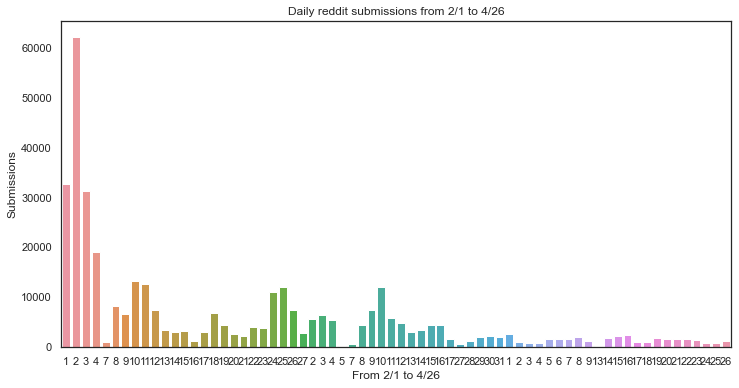

In [98]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 6))
sns.barplot(x = 'full_date', y = 'title', data = day_by)
plt.xticks(np.arange(68), list(day_by['day']))
plt.xlabel("From 2/1 to 4/26")
plt.ylabel("Submissions")
plt.title("Daily reddit submissions from 2/1 to 4/26");

**Updating my database with additional data**

In [103]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb')
cursor = connection.cursor()
cursor.execute('''
SELECT *
FROM wallstreetbets''')
table_rows = cursor.fetchall()
df1 = pd.DataFrame(table_rows)

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877695 entries, 0 to 877694
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       877695 non-null  object
 1   1       877695 non-null  int64 
 2   2       877695 non-null  object
 3   3       877695 non-null  object
 4   4       877695 non-null  object
 5   5       877695 non-null  object
dtypes: int64(1), object(5)
memory usage: 40.2+ MB


In [105]:
df1.columns = ['author', 'score', 'selftext', 'time', 'title', 'url']
df1.head(5)

,author,score,selftext,time,title,url
0,OPINION_IS_UNPOPULAR,1,,2021-01-25T15:28:22,"""Investor Here. Sold 100% of my GameStop Stock...",/r/GameStop/comments/kdgckf/investor_here_sold...
1,afrankiewicz12,1,,2021-02-09T08:01:01,Did anyone know you can view daily short volum...,ftp://ftp.nasdaqtrader.com/files/shortsaledata...
2,Krackis,1,,2021-02-02T08:23:51,NYSE short circuit breaker report Showing $GME...,ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...
3,[deleted],1,[deleted],2021-02-02T09:18:56,"NYSE puts GME on Short Sale Restriction List, ...",ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...
4,SolAureusAstra,3,,2021-02-02T08:02:11,GME has been put on the NYSE Short Sale Circui...,ftp://ftp.nyxdata.com/NYSEGroupSSRCircuitBreak...


**data type change**

In [107]:
df1['time'] = pd.to_datetime(df1['time'])
df1['day_of_week'] = df1['time'].dt.day_name()

**daily # of submissions**

In [108]:
df1['day_of_week'].value_counts()

Thursday     250455
Wednesday    162087
Friday       141457
Tuesday      107431
Monday        85291
Saturday      70279
Sunday        60695
Name: day_of_week, dtype: int64

**day to day submissions**

In [109]:
df1['day'] = df1['time'].dt.day
df1['month'] = df1['time'].dt.month
df1['year'] = df1['time'].dt.year

In [110]:
df1.groupby(['year','month','day']).agg({'title':'count'})

title
year month day       
2021 1     1      552
           2      647
           3      586
           4     1098
           5     1015
...               ...
     4     22    1606
           23    1544
           24     872
           25     917
           26    1350

[99 rows x 1 columns]

In [111]:
day_by1 = df1.groupby(['year', 'month','day']).agg({'title':'count'}).reset_index()

In [112]:
day_by1['full_date']= pd.to_datetime(day_by1[['year','month','day']])

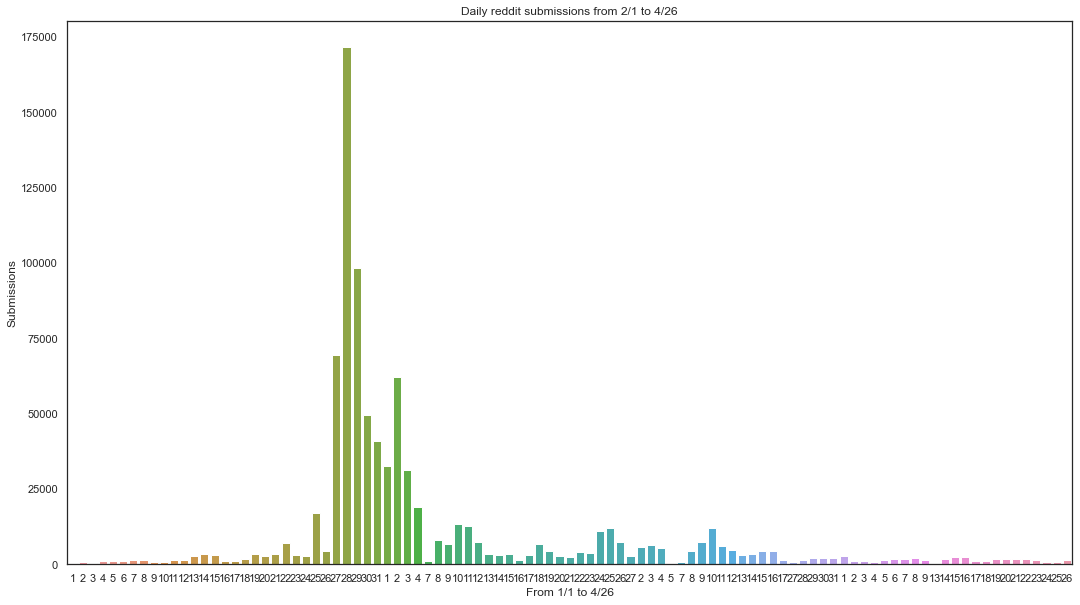

In [392]:
sns.set_theme(style='white')
plt.figure(figsize=(18, 10))
sns.barplot(x = 'full_date', y = 'title', data = day_by1)
plt.xticks(np.arange(99), list(day_by1['day']))
plt.xlabel("From 1/1 to 4/26")
plt.ylabel("Submissions")
plt.title("Daily reddit submissions from 2/1 to 4/26");

A lot of submissions in between 1/27~2/4

In [118]:
df1.to_csv(r'C:\Users\brian\Desktop\Data Science\wallstreetbets.csv')

In [119]:
df1['title']

0         "Investor Here. Sold 100% of my GameStop Stock...
1         Did anyone know you can view daily short volum...
2         NYSE short circuit breaker report Showing $GME...
3         NYSE puts GME on Short Sale Restriction List, ...
4         GME has been put on the NYSE Short Sale Circui...
                                ...                        
877690    Lexicon Pharmaceuticals (LXRX) will grow this ...
877691    Avinger, Inc. (NASDAQ:AVGR) Sees Large Growth ...
877692    BARKBOX merger confirmed for mid April via Joa...
877693    Comparing and graphing 2.2 million replies in ...
877694    Tron's Justin Sun Allocates $10 Million To Pur...
Name: title, Length: 877695, dtype: object

In [120]:
import spacy
from spacy import displacy

In [122]:
nlp = spacy.load('en_core_web_sm')

In [161]:
def getmention(text):
    doc=nlp(text)
    org_list = []
    for entity in doc.ents:
        if entity.label_ == 'ORG':
            org_list.append(entity.text)
    org_list = list(set(org_list))
    return org_list

In [162]:
df1['org'] = df1['title'].apply(getmention)

In [133]:
df1['title'][2]

'NYSE short circuit breaker report Showing $GME is on the list for 2/3/2021'

In [149]:
doc=nlp(df1['title'][2])

In [172]:
org_list = []


for entity in doc.ents:
        if entity.label_ == 'ORG':
            if len(entity.text) < 5:
                org_list.append(entity.text)
org_list

['NYSE', 'GME']

In [144]:
print(org_list)

[]


In [142]:
doc.ents

(NYSE, GME, 2/3/2021)

In [146]:
for entity in doc.ents:
    print('{}:{}'.format(entity.label_, entity.text))

ORG:NYSE
ORG:GME
CARDINAL:2/3/2021


In [160]:
getmention(df1['title'][2])

['NYSE', 'GME']

In [163]:
df1['org']

0                                []
1                          [NASDAQ]
2                       [NYSE, GME]
3                       [NYSE, GME]
4                       [NYSE, GME]
                    ...            
877690    [Lexicon Pharmaceuticals]
877691      [NASDAQ, Avinger, Inc.]
877692                           []
877693                  [Comparing]
877694           [Tron, Justin Sun]
Name: org, Length: 877695, dtype: object

In [165]:
from collections import Counter
from itertools import chain

In [166]:
df2 =pd.Series(Counter(chain(*df1.org))).sort_index().rename_axis('org').reset_index(name='#ofMentions')

In [ ]:
df2.sort_values('#ofMentions', ascending=False).head(100)

In [174]:
df1['org'][2]

['NYSE', 'GME']

In [176]:
'GME' in df1['org'][2]

True

In [186]:
class Stock:
    def __init__(self, name):
        self.name = name
    
    # Check stock from ORG column
    def check(self, list):
        if self.name in list:
            return 1
        else:
            return 0

In [190]:
# Assigning interested stocks into objects
GME = Stock('GME')
AMC = Stock('AMC')
NOK = Stock('NOK')
NAKD = Stock('NAKED')
PLTR = Stock('PLTR')
BB = Stock('BB')
SLV = Stock('SLV')
RH = Stock('RH')
APHA = Stock('APHA')
AMD = Stock('AMD')
AAC = Stock('AAC')
CCIV = Stock('CCIV')
HODL = Stock('HODL')
BBBY = Stock('BBBY')
ZOM = Stock('ZOM')
APPLE = Stock('APPLE')
SOS = Stock('SOS')
KOSS = Stock('KOSS')
AMAZON = Stock('Amazon')

In [192]:
testdf = df1.head(10)

In [194]:
df1['gme'] = testdf['org'].apply(GME.check)

In [215]:
# Created new rows to count each stock mentions
stock_list = [GME, AMC, NOK, NAKD, PLTR, BB, SLV, RH, APHA, AMD, AAC, CCIV, HODL, BBBY, ZOM, APPLE, SOS, KOSS, AMAZON]
for stock in stock_list:
    df1[stock.name] = df1['org'].apply(stock.check)

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877695 entries, 0 to 877694
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   author       877695 non-null  object        
 1   score        877695 non-null  int64         
 2   selftext     877695 non-null  object        
 3   time         877695 non-null  datetime64[ns]
 4   title        877695 non-null  object        
 5   url          877695 non-null  object        
 6   day_of_week  877695 non-null  object        
 7   day          877695 non-null  int64         
 8   month        877695 non-null  int64         
 9   year         877695 non-null  int64         
 10  org          877695 non-null  object        
 11  GME          877695 non-null  int64         
 12  AMC          877695 non-null  int64         
 13  NOK          877695 non-null  int64         
 14  NAKED        877695 non-null  int64         
 15  PLTR         877695 non-null  int6

In [235]:
df1 = df1.sort_values('time', ascending = True)  # Re sort the list in time order

In [246]:
stock_column_list = ['GME', 'AMC', 'NOK', 'NAKED', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'Amazon']
for column in stock_column_list:
    column_cumsum = column + "_sum"
    df1[column] = df1[column].cumsum()

In [260]:
df1['full_date']= pd.to_datetime(df1[['year','month','day']])

(array([18628., 18642., 18659., 18673., 18687., 18701., 18718., 18732.,
        18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

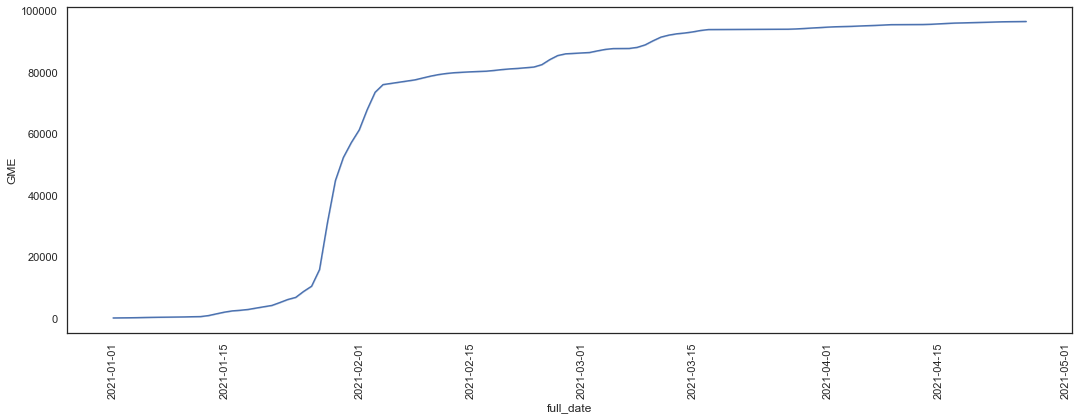

In [275]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='full_date', y='GME', data = df1)
plt.xticks(rotation=90)

In [391]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='full_date', y='GME_sum', data = df1)
sns.lineplot(x='full_date', y='AMC_sum', data = df1)
sns.lineplot(x='full_date', y='NOK_sum', data = df1)
sns.lineplot(x='full_date', y='PLTR_sum', data = df1)
sns.lineplot(x='full_date', y='BB_sum', data = df1)
plt.xticks(rotation=90)

ValueError: Could not interpret value `GME_sum` for parameter `y`

<Figure size 1296x432 with 0 Axes>

In [262]:
df1 = df1[['author', 'score', 'selftext', 'time', 'title', 'url', 'day_of_week', 'day', 'month', 'year',
          'GME', 'AMC', 'NOK', 'NAKED', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC','CCIV', 'HODL', 'BBBY', 
           'ZOM', 'APPLE', 'SOS', 'KOSS', 'Amazon', 'full_date']]

In [253]:
df3 = df1[['author', 'score', 'selftext', 'time', 'title', 'url', 'day_of_week', 'day', 'month', 'year', 'org','full_date']]

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877695 entries, 354971 to 266126
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   author       877695 non-null  object        
 1   score        877695 non-null  int64         
 2   selftext     877695 non-null  object        
 3   time         877695 non-null  datetime64[ns]
 4   title        877695 non-null  object        
 5   url          877695 non-null  object        
 6   day_of_week  877695 non-null  object        
 7   day          877695 non-null  int64         
 8   month        877695 non-null  int64         
 9   year         877695 non-null  int64         
 10  GME          877695 non-null  int64         
 11  AMC          877695 non-null  int64         
 12  NOK          877695 non-null  int64         
 13  NAKED        877695 non-null  int64         
 14  PLTR         877695 non-null  int64         
 15  BB           877695 non-null 

In [265]:
hostname="localhost"
dbname="mydb"
uname="root"
pwd="pos99247"
engine = create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host=hostname, db=dbname, user=uname, pw=pwd))

df1.to_sql('reddit_init', engine, index=False)

In [287]:
engine = create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host=hostname, db=dbname, user=uname, pw=pwd))

daybyday.to_sql('daybyday', engine, index=False)

In [290]:
daybyday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   full_date  99 non-null     datetime64[ns]
 1   title      99 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [291]:
daybyday['full_date'] = daybyday['full_date'].astype('object')

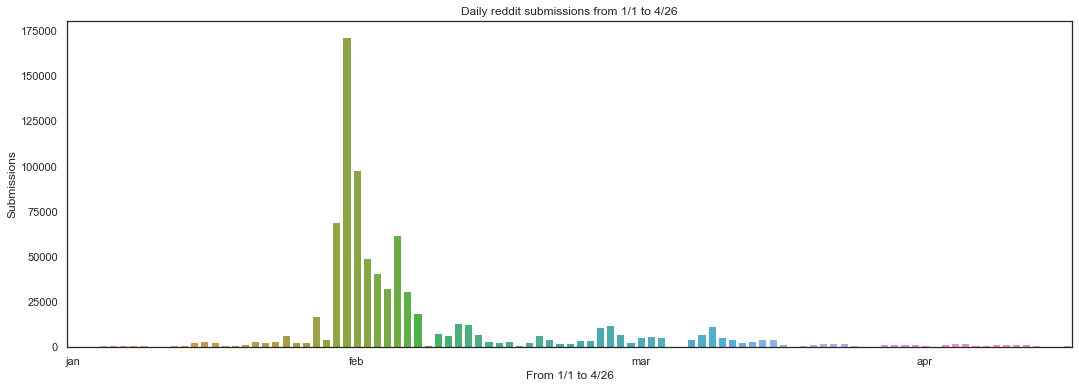

In [371]:
sns.set_theme(style='white')
plt.figure(figsize=(18, 6))
sns.barplot(x = 0, y = 1, data = daybyday)
plt.xticks(np.arange(0,99, step = 28), ['jan', 'feb', 'mar', 'apr'])
plt.xlabel("From 1/1 to 4/26")
plt.ylabel("Submissions")
plt.title("Daily reddit submissions from 1/1 to 4/26");

In [286]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877695 entries, 354971 to 266126
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   author       877695 non-null  object        
 1   score        877695 non-null  int64         
 2   selftext     877695 non-null  object        
 3   time         877695 non-null  datetime64[ns]
 4   title        877695 non-null  object        
 5   url          877695 non-null  object        
 6   day_of_week  877695 non-null  object        
 7   day          877695 non-null  int64         
 8   month        877695 non-null  int64         
 9   year         877695 non-null  int64         
 10  GME          877695 non-null  int64         
 11  AMC          877695 non-null  int64         
 12  NOK          877695 non-null  int64         
 13  NAKED        877695 non-null  int64         
 14  PLTR         877695 non-null  int64         
 15  BB           877695 non-null 

In [294]:
daybyday.head()

,full_date,title
0,2021-01-01 00:00:00,552
1,2021-01-02 00:00:00,647
2,2021-01-03 00:00:00,586
3,2021-01-04 00:00:00,1098
4,2021-01-05 00:00:00,1015


In [335]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb',
                            cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()


cursor.execute('''SELECT * FROM reddit_init''')
table3_rows = cursor.fetchall()
reddit = pd.DataFrame(table3_rows)

In [336]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877695 entries, 0 to 877694
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   author       877695 non-null  object        
 1   score        877695 non-null  int64         
 2   selftext     877695 non-null  object        
 3   time         877695 non-null  datetime64[ns]
 4   title        877695 non-null  object        
 5   url          877695 non-null  object        
 6   day_of_week  877695 non-null  object        
 7   day          877695 non-null  int64         
 8   month        877695 non-null  int64         
 9   year         877695 non-null  int64         
 10  GME          877695 non-null  int64         
 11  AMC          877695 non-null  int64         
 12  NOK          877695 non-null  int64         
 13  NAKED        877695 non-null  int64         
 14  PLTR         877695 non-null  int64         
 15  BB           877695 non-null  int6

In [314]:
cursor.execute("""SELECT *
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = n'reddit_init'""")

30

In [298]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       99 non-null     datetime64[ns]
 1   1       99 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [304]:
daybyday[0] = daybyday[0].astype('object')

In [337]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877695 entries, 0 to 877694
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   author       877695 non-null  object        
 1   score        877695 non-null  int64         
 2   selftext     877695 non-null  object        
 3   time         877695 non-null  datetime64[ns]
 4   title        877695 non-null  object        
 5   url          877695 non-null  object        
 6   day_of_week  877695 non-null  object        
 7   day          877695 non-null  int64         
 8   month        877695 non-null  int64         
 9   year         877695 non-null  int64         
 10  GME          877695 non-null  int64         
 11  AMC          877695 non-null  int64         
 12  NOK          877695 non-null  int64         
 13  NAKED        877695 non-null  int64         
 14  PLTR         877695 non-null  int64         
 15  BB           877695 non-null  int6

In [358]:
test1 = reddit.groupby(['full_date']).agg({'GME':'sum', 'AMC':'sum', 'NOK':'sum', 'NAKED':'sum', 'PLTR':'sum', 
                                           'BB':'sum', 'SLV':'sum', 'RH':'sum', 'APHA':'sum', 
                                           'AMD':'sum', 'AAC':'sum','CCIV':'sum', 'HODL':'sum', 'BBBY':'sum', 
                                           'ZOM':'sum', 'APPLE':'sum', 'SOS':'sum', 'KOSS':'sum', 'Amazon':'sum'})
test1

,GME,AMC,NOK,NAKED,PLTR,BB,SLV,RH,APHA,AMD,AAC,CCIV,HODL,BBBY,ZOM,APPLE,SOS,KOSS,Amazon
full_date,,,,,,,,,,,,,,,,,,,
2021-01-01,8904,389,0,0,8856,0,0,0,0,0,0,0,0,260,0,0,0,0,0
2021-01-02,30642,1041,0,0,20245,0,0,0,0,178,0,0,0,1154,0,0,0,0,14
2021-01-03,44056,1825,0,0,33398,0,0,0,0,1172,0,0,0,1172,0,0,0,0,1560
2021-01-04,129345,5490,0,0,101231,0,0,0,0,3212,0,0,0,2196,1230,0,0,0,8587
2021-01-05,181609,5340,0,0,127141,0,623,836,0,4363,0,0,0,3015,4012,0,0,0,9211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,154689794,66233833,22952952,114026,4525189,3486626,2857074,1222166,1153108,1082444,0,989296,969741,931480,876012,59422,835408,825484,801394
2021-04-23,148832549,63719875,22069324,109624,4355740,3352024,2746776,1174984,1109574,1049148,0,951452,937049,895520,844489,57128,804424,793616,770456
2021-04-24,84090097,36001079,12464368,61912,2465182,1893112,1552463,663592,626968,594788,0,538024,530634,505760,476984,32264,454312,448208,436609


Text(0.5, 1.0, '2021-01-01 mentions of stocks on wallstreetbets')

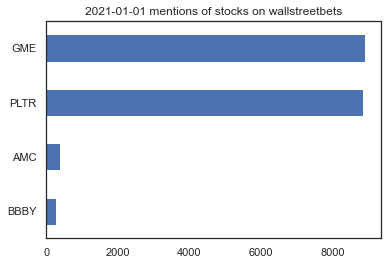

In [365]:
row = test1.loc['2021-01-01']
row = row[row>0]
row = row.sort_values()
row.plot(kind = 'barh')
plt.title('2021-01-01 mentions of stocks on wallstreetbets')

In [366]:
def daily_mention_grapher(date):
    row = test1.loc[date]
    row = row[row>0]
    row = row.sort_values()
    row.plot(kind = 'barh')
    plt.title('2021-01-01 mentions of stocks on wallstreetbets')

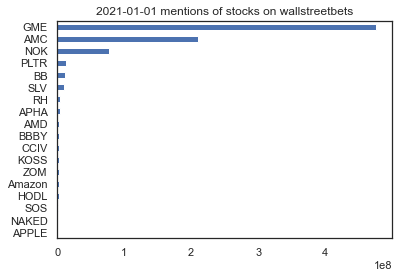

In [369]:
daily_mention_grapher('2021-03-04')

In [372]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [375]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...


True

In [376]:
sia = SIA()
results = []
for title in df1['title'].head(10):
    pol_score = sia.polarity_scores(title)
    pol_score['title'] = title
    results.append(pol_score)

print(results)

[{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351, 'title': 'Best Plays for January 2021 - Don’t ask for proof'}, {'neg': 0.161, 'neu': 0.629, 'pos': 0.21, 'compound': 0.1779, 'title': "ahahaha awards are stupidz burning mine, smh. I'm snort you dum"}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'title': 'RYCEY Stock'}, {'neg': 0.287, 'neu': 0.37, 'pos': 0.343, 'compound': 0.1531, 'title': 'Happy New Year you Degenerate fucks'}, {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732, 'title': 'PLTR: How much will it drop before rocketing again? 🚀🚀🚀'}, {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.875, 'title': 'THE ONLY pure play for feeding China on the Nasdaq. 3 mil float. 5 mil outstanding. $Seed is a company that will get you rich.'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'title': 'ARKG + SPAC? Take My Money Immediately 🚀'}, {'neg': 0.126, 'neu': 0.683, 'pos': 0.191, 'compound': 0.2263, 'title': 'Lets hope that during the new year r

In [377]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,title
0,0.000,0.530,0.470,0.7351,Best Plays for January 2021 - Don’t ask for proof
1,0.161,0.629,0.210,0.1779,"ahahaha awards are stupidz burning mine, smh. ..."
2,0.000,1.000,0.000,0.0000,RYCEY Stock
3,0.287,0.370,0.343,0.1531,Happy New Year you Degenerate fucks
4,0.189,0.811,0.000,-0.2732,PLTR: How much will it drop before rocketing a...
5,0.000,0.655,0.345,0.8750,THE ONLY pure play for feeding China on the Na...
6,0.000,1.000,0.000,0.0000,ARKG + SPAC? Take My Money Immediately 🚀
7,0.126,0.683,0.191,0.2263,Lets hope that during the new year retarded po...
8,0.000,0.667,0.333,0.7906,PLTR bull tries to flex the Reddit karma he ga...
9,0.000,0.592,0.408,0.7840,Happy new year ! Funny that the only green one...


In [378]:
df['title'][0]

'Best Plays for January 2021 - Don’t ask for proof'

In [380]:
df['title'][9]

'Happy new year ! Funny that the only green one is the gilead.'

In [387]:
daybyday[0].max()

Timestamp('2021-04-26 00:00:00')

In [388]:
daybyday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       99 non-null     object
 1   1       99 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [390]:
daybyday['full_date'] = daybyday[0].to_datetime

AttributeError: 'Series' object has no attribute 'to_datetime'

In [ ]:
df['date_only'] = df['date_time_column'].dt.date